# The Process

![Data Science Overview](assets\images\DataScienceOverview.png)

[Image Reference](https://www.oreilly.com/library/view/architectural-patterns/9781787287495/5c8b6daa-6c72-4e9e-a374-6c1c5f31ee0f.xhtml)

# The Tools

![Data Science Tools](assets\images\DataScienceTools.png)

[Image Reference](http://datasciencecornwall.blogspot.com/2018/09/python-for-data-science-top-10-tools.html)

# Step 1 - Determine the problem
What is the question we are trying to answer? 

Have you ever wondered how Spotify or Pandora suggest songs to you based on what is in your playlist? Or when you shop on the American Eagle website how does it know to recommend those "Frequently bought together items?" These types of recommendations are now part of our daily lives. They may seem very simple on the surface, but they are actually complext mathematical systems and statistical algorithms used to predict these recommendations. 

Today, we are going to create a simple movie recommender system using Python.


# Step 2 - Collect Data
List the size of the data and the source.


# Step 3 - Explore the Data
This is usually an iterative process. What is in our data and how can we use it, maniuplate it, and understand it to solve our problem?

We will use the NumPy and Pandas libraries to help us with this process. NumPy is the foundational library used for computational data science with Python. We use functions in this library to do the math "heavy lifting". Pandas is based on NumPy and is mainly used for data manipulation 

Since we are creating a movie recommender, it makes sense to take a peek at the movie data first. 
___
***Exercise***

Run the code in the block below

In [1]:
import numpy as np 
import pandas as pd

movie_names = pd.read_csv("assets\data\ml-latest-small\\movies.csv")  
movie_names.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy

From the dataframe above, we get a peek into our data and its formatting. 

### Exercise
Record some observations about the movies data in this markdown block. 

1. *What information do we have about each movie?*
   - Insert Answer here 
Title, Genres, and Movieid
2. What do you notice about the title data? 
It has the year
3. What do you notice about the genres data?
It is in alphabetical order

In [2]:
Does this data look like it will be useful for our purposes?

We have seen the first few rows of our movies data. Now, let's explore the data a bit further by taking a look at more of the data. 
_____
### Exercise
Do each of the following in a separate code block on the movie_names data.
1. Take a look at the first 20 rows of the data.
2. Use the `.tail()` to look at the last 10 rows of data.

SyntaxError: invalid syntax (<ipython-input-2-ac5471583a84>, line 3)

In [ ]:
So, we have taken a pretty good look at our movies_data, but is it enough data to create recommendations? What other data do you think we might need to make an effective recommendation system?

In [ ]:
So, we have taken a pretty good look at our movies_data, but is it enough data to create recommendations? What other data do you think we might need to make an effective recommendation system

_________
### Exercise
1. Create a new code block and load the ratings.csv file into a dataframe called ratings_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?

In [4]:

ratings_data = pd.read_csv("assets\data\ml-latest-small\\ratings.csv")


In [5]:

ratings_data.head(20)


userId  movieId  rating  timestamp
0        1        1     4.0  964982703
1        1        3     4.0  964981247
2        1        6     4.0  964982224
3        1       47     5.0  964983815
4        1       50     5.0  964982931
5        1       70     3.0  964982400
6        1      101     5.0  964980868
7        1      110     4.0  964982176
8        1      151     5.0  964984041
9        1      157     5.0  964984100
10       1      163     5.0  964983650
11       1      216     5.0  964981208
12       1      223     3.0  964980985
13       1      231     5.0  964981179
14       1      235     4.0  964980908
15       1      260     5.0  964981680
16       1      296     3.0  964982967
17       1      316     3.0  964982310
18       1      333     5.0  964981179
19       1      349     4.0  964982563

The ratings are from 1 to 5 

_________
### Exercise
1. Create a new code block and load the links.csv file into a dataframe called links_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?_________

In [ ]:
links_data = pd.read_csv("assets\data\ml-latest-small\\links.csv")

In [ ]:
links_data.head(20)

_________
### Exercise
1. Create a new code block and load the tags.csv file into a dataframe called tags_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data. Will this data be useful for our recommender?

In [ ]:
tags_data = pd.read_csv("assets\data\ml-latest-small\\tags.csv")

In [ ]:
tags_data.head(20)

# Step 4 - Analyze the Data

We have taken a look at the data available to us and it seems as if the ratings_data and the movie_names will be most useful for our purposes. We did notice that the ratings_data dataframe contains the movieId but not the movie title which makes it difficult for us to understand it. We need a way to add the movie_names data to the ratings_data. For this we can use a pandas method called `merge()` which has the following usage:

`pd.merge(left, right, on=?)`
- **left**: A DataFrame or named Series object.
- **right**: Another DataFrame or named Series object.
- **on**: Column or index level names to join on. Must be found in both the left and right DataFrame and/or Series objects.

_________
### Exercise
1. Create a new code block and use the pandas `.merge()` to the ratings_data with the movie_names data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data

In [6]:

movie_data = pd.merge(ratings_data, movie_names, on='movieId')
movie_data.head()

userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3  Adventure|Animation|Children|Comedy|Fantasy  
4  Adventure|Animation|Children|Comedy|Fantasy

Now we have our movie names with ratings, but for each movie title, we have individual ratings. What would really be more useful is to have the mean or average of the ratings for each movie. We can do that by using the pandas method `.groupby.mean()`

Let's take a look at the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html?highlight=mean#pandas.core.groupby.GroupBy.mean) for that method.

I think the last example is the one that makes sense for our case.

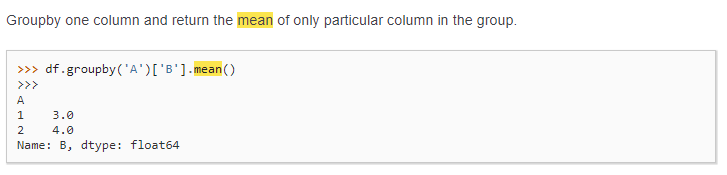

_________
### Exercise
1. Create a new code block and use the pandas `.groupby()` and `mean()` methods to put the average data in a dataframe called averaged_movie_data.
2. Create a new code block and use the `.head()` method to take a look at the data.
3. Create a markdown block to note any observations you make about the data

In [8]:
#remove this answer block
averaged_movie_data = movie_data.groupby('title')['rating'].mean()
averaged_movie_data.head()

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64

Ok! Now we have movie names along with their averge rating. It looks like the list is sorted on title. Wouldn't it be more helpful if the list was sorted by average rating? I would like to see the movies that had the highest ratings.

_________
### Exercise
1. Create a new code block and use the pandas `.sort_values()` method on the averaged_movie_data dataframe.
2. This time, try "chaining" the `head()` method on the end as a shorthand way to see the data.
3. Create a markdown block to note any observations you make about the data.

In [11]:
#remove this answer block
averaged_movie_data.sort_values(ascending=False).head()  

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

Hmmm...The thing I noticed about this data is I have not heard of any of these movies. Why do you think that is? Do you think the data in this format will help us create a great recommender system? 

I am wondering if the number of ratings for each movie is affecting this?
_________
### Exercise
1. Create a new code block and use the pandas `.sort_values()` method on the averaged_movie_data dataframe.
2. This time, try "chaining" the `head()` method on the end as a shorthand way to see the data.
3. Create a markdown block to note any observations you make about the data.

In [16]:
movie_ratings_count = movie_data.groupby('title')['rating'].count().sort_values(ascending=False)
movie_ratings_count.head(20)

title
Forrest Gump (1994)                                                               329
Shawshank Redemption, The (1994)                                                  317
Pulp Fiction (1994)                                                               307
Silence of the Lambs, The (1991)                                                  279
Matrix, The (1999)                                                                278
Star Wars: Episode IV - A New Hope (1977)                                         251
Jurassic Park (1993)                                                              238
Braveheart (1995)                                                                 237
Terminator 2: Judgment Day (1991)                                                 224
Schindler's List (1993)                                                           220
Fight Club (1999)                                                                 218
Toy Story (1995)                                

In [13]:
ratings_mean_count = pd.DataFrame(averaged_movie_data)
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_ratings_count)  
ratings_mean_count.head()  

rating  rating_counts
title                                                         
'71 (2014)                                  4.0              1
'Hellboy': The Seeds of Creation (2004)     4.0              1
'Round Midnight (1986)                      3.5              2
'Salem's Lot (2004)                         5.0              1
'Til There Was You (1997)                   4.0              2

In [18]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())  
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())  
ratings_mean_count.head(20)  

rating  rating_counts
title                                                               
'71 (2014)                                   4.000000              1
'Hellboy': The Seeds of Creation (2004)      4.000000              1
'Round Midnight (1986)                       3.500000              2
'Salem's Lot (2004)                          5.000000              1
'Til There Was You (1997)                    4.000000              2
'Tis the Season for Love (2015)              1.500000              1
'burbs, The (1989)                           3.176471             17
'night Mother (1986)                         3.000000              1
(500) Days of Summer (2009)                  3.666667             42
*batteries not included (1987)               3.285714              7
...All the Marbles (1981)                    2.000000              1
...And Justice for All (1979)                3.166667              3
00 Schneider - Jagd auf Nihil Baxter (1994)  4.500000              1
1-900 (06) (1994)                            4.000000              1
10 (1979)                                    3.375000              4
10 Cent Pistol (2015)                        1.250000              2
10 Cloverfield Lane (2016)                   3.678571             14
10 Items or Less (2006)                      2.666667              3
10 Things I Hate About You (1999)            3.527778             54
10 Years (2011)                              3.500000              1

Now, we have our data mapped to show both the rating and the number of ratings. Continuing to explore our data, let's use the `matplotlib` library to help give us an idea of how many ratings there are for each movie.

# Step 4 - Visualize the Data

For the next section, we will be using the matplotlib library to visualize the data we are working with,

Text(0, 0.5, 'Number of Movies')

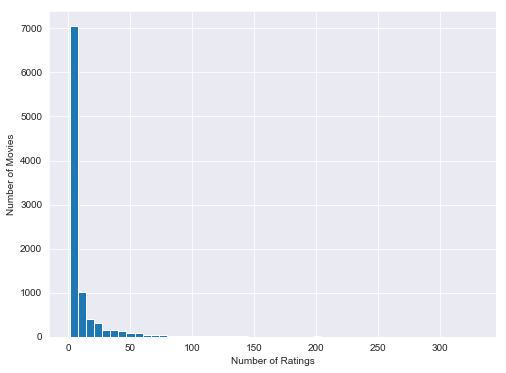

In [17]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline

plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
ratings_mean_count['rating_counts'].hist(bins=50)  
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")

From this, we can see that a vast majority of the movies have less than 50 ratings. Let's take a look at the average ratings using a histogram. 

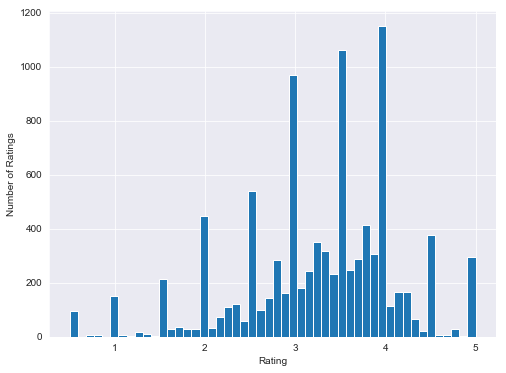

In [19]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
ratings_mean_count['rating'].hist(bins=50)  


We generally believe that movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating. Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 576x432 with 0 Axes>

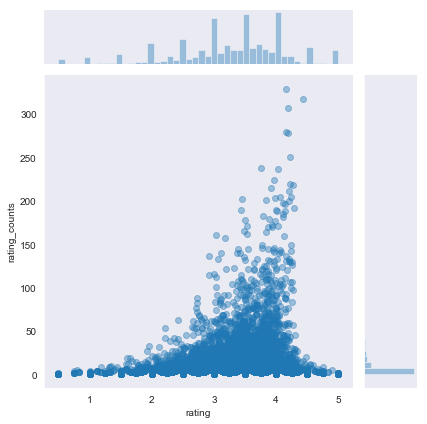

In [20]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)  

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

# Step 5 - Take Action and Make Decisions
We spent quite a bit of time on visualizing and preprocessing our data. Now is the time to find the similarity between movies.

We will use the correlation between the ratings of a movie as the similarity metric. To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie. Bear in mind that this matrix will have a lot of null values since every movie is not rated by every user.

In [21]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  
user_movie_rating.head() 

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2                          NaN                  NaN   
3                          NaN                  NaN   
4                          NaN                  NaN   
5                          NaN                  NaN   

title   'Til There Was You (1997)  'Tis the Season for Love (2015)  \
userId                                                               
1                             NaN                              NaN   
2                             NaN                              NaN   
3                             NaN                              NaN   
4                             NaN                              NaN   
5                             NaN                              NaN   

title   'burbs, The (1989)  'night Mother (1986)  (500) Days of Summer (2009)  \
userId                                                                          
1                      NaN                   NaN                          NaN   
2                      NaN                   NaN                          NaN   
3                      NaN                   NaN                          NaN   
4                      NaN                   NaN                          NaN   
5                      NaN                   NaN                          NaN   

title   *batteries not included (1987)  \
userId                                   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
5                                  NaN   

title                     ...                      Zulu (2013)  [REC] (2007)  \
userId                    ...                                                  
1                         ...                              NaN           NaN   
2                         ...                              NaN           NaN   
3                         ...                              NaN           NaN   
4                         ...                              NaN           NaN   
5                         ...                              NaN           NaN   

title   [REC]² (2009)  [REC]³ 3 Génesis (2012)  \
userId                                           
1                 NaN                      NaN   
2                 NaN                      NaN   
3                 NaN                      NaN   
4                 NaN                      NaN   
5                 NaN                      NaN   

title   anohana: The Flower We Saw That Day - The Movie (2013)  \
userId                                                           
1                                                     NaN        
2                                                     NaN        
3                                                     NaN        
4                                                     NaN        
5                                                     NaN        

title   eXistenZ (1999)  xXx (2002)  xXx: State of the Union (2005)  \
userId                                                                
1                   NaN         NaN                             NaN   
2                   NaN         NaN                             NaN   
3                   NaN         NaN                             NaN   
4                   NaN         NaN                             NaN   
5                

We know that each column contains all the user ratings for a particular movie. Let's find all the user ratings for the movie "Forrest Gump (1994)" and find the movies similar to it. We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

To find the user ratings for "Forrest Gump (1994)", execute the following script:

In [22]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']  
forrest_gump_ratings.head()  

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

Now let's retrieve all the movies that are similar to "Forrest Gump (1994)". We can find the correlation between the user ratings for the "Forest Gump (1994)" and all the other movies using corrwith() function as shown below:

In [23]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head()  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


Correlation
title                                      
'burbs, The (1989)                 0.197712
(500) Days of Summer (2009)        0.234095
*batteries not included (1987)     0.892710
...And Justice for All (1979)      0.928571
10 Cent Pistol (2015)             -1.000000

In the above script, we first retrieved the list of all the movies related to "Forrest Gump (1994)" along with their correlation value, using corrwith() function. Next, we created a dataframe that contains movie title and correlation columns. We then removed all the NA values from the dataframe and displayed its first 5 rows using the head function.

Let's sort the movies in descending order of correlation to see highly correlated movies at the top. Execute the following script:

In [24]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10) 

Correlation
title                                                 
Lost & Found (1999)                                1.0
Century of the Self, The (2002)                    1.0
The 5th Wave (2016)                                1.0
Play Time (a.k.a. Playtime) (1967)                 1.0
Memories (Memorîzu) (1995)                         1.0
Playing God (1997)                                 1.0
Killers (2010)                                     1.0
Girl Walks Home Alone at Night, A (2014)           1.0
Tampopo (1985)                                     1.0
Cercle Rouge, Le (Red Circle, The) (1970)          1.0

From the output you can see that the movies that have high correlation with "Forrest Gump (1994)" are not very well known. This shows that correlation alone is not a good metric for similarity because there can be a user who watched '"Forest Gump (1994)" and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings. To do so, will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe. Execute the following script to do so:

In [25]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head()  

Correlation  rating_counts
title                                                     
'burbs, The (1989)                 0.197712             17
(500) Days of Summer (2009)        0.234095             42
*batteries not included (1987)     0.892710              7
...And Justice for All (1979)      0.928571              3
10 Cent Pistol (2015)             -1.000000              2

You can see that the movie "...And Justice for All (1979)", which has the highest correlation has only three ratings. This means that only three users gave same ratings to "Forest Gump (1994)", "...And Justice for All (1979)". However, we can deduce that a movie cannot be declared similar to the another movie based on just 3 ratings. This is why we added "rating_counts" column. Let's now filter movies correlated to "Forest Gump (1994)", that have more than 50 ratings. The following code will do that:

In [27]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head(20)  

Correlation  rating_counts
title                                                                         
Forrest Gump (1994)                                    1.000000            329
Mr. Holland's Opus (1995)                              0.652144             80
Pocahontas (1995)                                      0.550118             68
Grumpier Old Men (1995)                                0.534682             52
Caddyshack (1980)                                      0.520328             52
Few Good Men, A (1992)                                 0.517146             57
Field of Dreams (1989)                                 0.503845             56
Big (1988)                                             0.492351             91
Hook (1991)                                            0.484676             53
Good Will Hunting (1997)                               0.484042            141
Lady and the Tramp (1955)                              0.464827             55
Aladdin (1992)                                         0.464268            183
Good, the Bad and the Ugly, The (Buono, il brut...     0.461204             72
American History X (1998)                              0.457287            129
Space Jam (1996)                                       0.455805             53
Wallace & Gromit: The Wrong Trousers (1993)            0.452137             56
Legends of the Fall (1994)                             0.439889             68
Contact (1997)                                         0.438597             82
Moulin Rouge (2001)                                    0.436715             55
Truman Show, The (1998)                                0.432556            125

Now you can see from the output the movies that are highly correlated with "Forrest Gump (1994)". The movies in the list are are also popular Hollywood movies, and since "Forest Gump (1994)" is also a very famous movie, there is a high chance that these movies are correlated.

_________
### Exercise
1. Run the following code block with our "improved" recommender to see what is recommended for Toy Story.
2. Do you agree with the movies that were recommended? Why? or Why not?

In [50]:
my_movie_ratings = user_movie_rating['Jumanji: Welcome to the Jungle (2017)']  
movies_like_my_movie = user_movie_rating.corrwith(my_movie_ratings)
corr_my_movie = pd.DataFrame(movies_like_my_movie, columns=['Correlation'])  
corr_my_movie.dropna(inplace=True)   
corr_my_movie = corr_my_movie.join(ratings_mean_count['rating_counts'])  
corr_my_movie[corr_my_movie ['rating_counts']>50].sort_values('Correlation', ascending=False).head(50)    

Correlation  rating_counts
title                                                                         
Shrek 2 (2004)                                         1.000000             92
Mummy, The (1999)                                      1.000000             87
Ace Ventura: Pet Detective (1994)                      1.000000            161
Pirates of the Caribbean: Dead Man's Chest (2006)      1.000000             72
Heat (1995)                                            1.000000            102
Men in Black (a.k.a. MIB) (1997)                       1.000000            165
Jumanji (1995)                                         1.000000            110
Charlie's Angels (2000)                                1.000000             72
Shrek (2001)                                           0.958373            170
X2: X-Men United (2003)                                0.866025             76
Toy Story 2 (1999)                                     0.693375             97
School of Rock (2003)                                  0.577350             66
X-Men (2000)                                           0.552052            133
Donnie Darko (2001)                                    0.500000            109
Pan's Labyrinth (Laberinto del fauno, El) (2006)       0.500000             81
Harry Potter and the Chamber of Secrets (2002)         0.419314            102
Batman Begins (2005)                                   0.210042            116
Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2...     0.188982             61
Back to the Future (1985)                              0.174078            171
Indiana Jones and the Temple of Doom (1984)            0.000000            108
Hunt for Red October, The (1990)                       0.000000             90
Seven (a.k.a. Se7en) (1995)                            0.000000            203
Zombieland (2009)                                      0.000000             53
Snatch (2000)                                          0.000000             93
WALL·E (2008)                                          0.000000            104
Spider-Man 2 (2004)                                    0.000000             79
Iron Man (2008)                                       -0.075858             94
Saving Private Ryan (1998)                            -0.080845            188
Raiders of the Lost Ark (Indiana Jones and the ...    -0.085749            200
Pirates of the Caribbean: The Curse of the Blac...    -0.097590            149
X-Men: The Last Stand (2006)                          -0.114708             52
Star Wars: Episode V - The Empire Strikes Back ...    -0.147442            211
Star Wars: Episode IV - A New Hope (1977)             -0.161749            251
Groundhog Day (1993)                                  -0.172062            143
Sixth Sense, The (1999)                               -0.174078            179
Harry Potter and the Goblet of Fire (2005)            -0.188982             71
Harry Potter and the Order of the Phoenix (2007)      -0.188982             58
Shawshank Redemption, The (1994)                      -0.188982            317
Harry Potter and the Sorcerer's Stone (a.k.a. H...    -0.210042            107
Avengers, The (2012)                                  -0.235435             69
Deadpool (2016)                                       -0.258199             54
Pulp Fiction (1994)                                   -0.258199            307
Big Lebowski, The (1998)                              -0.277350            106
Social Network, The (2010)                            -0.292770             57
Star Wars: Episode VI - Return of the Jedi (1983)     -0.294174            196
Indiana Jones and the Last Crusade (1989)             -0.294174            140
Inception (2010)                                      -0.318182            143
Hangover, The (2009)                                  -0.333333             76
Guardians of the Galaxy (2014)                        -0.350325             59
Casino Royale (2006)   

_________
### Exercise
1. Create a new code block and run our recommender with 'Princess Bride, The (1987)'
1. Create a new code block and run our recommender with 'Star Wars: Episode IV - A New Hope (1977)'
2. Create a new code block and run our recommender with 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)'
4. Create a new code block and run our recommender with 'Finding Nemo (2003)'
1. Create a new code block and run our recommender with 'Dark Knight, The (2008)'
2. Do you agree with the movies that were recommended? Why? or Why not?

_________
### Exercise
1. Use the code below to look up some of your favorite movies and try them out in the recommender.

In [53]:
movie_names[movie_names['title'].str.contains('christopher robin', case=False)]

Empty DataFrame
Columns: [movieId, title, genres]
Index: []